In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [59]:
df=sns.load_dataset("titanic")

In [60]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [61]:
df=df[["survived","pclass","age","fare"]]

In [62]:
df.isnull().sum()

survived      0
pclass        0
age         177
fare          0
dtype: int64

In [63]:
df["age"].fillna(df["age"].mean(),inplace=True)

<ipython-input-63-d19ffe4f52c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"].fillna(df["age"].mean(),inplace=True)


In [64]:
df.isnull().sum()

survived    0
pclass      0
age         0
fare        0
dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop("survived",axis=1),df["survived"],test_size=0.3,random_state=101)

# Standradization

In [66]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [67]:
X_train

array([[-1.59418307,  0.03375654,  1.39097165],
       [ 0.81936748, -0.04438389, -0.52170584],
       [-0.38740779, -1.29463065, -0.25961883],
       ...,
       [-1.59418307,  0.89330119,  2.305488  ],
       [-1.59418307,  1.12772245,  0.59867038],
       [ 0.81936748,  0.01024546,  0.85676027]])

<ipython-input-68-349493fc4801>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[0],kde=True)  # Dist with Mean=0 and Std dev =1


<Axes: ylabel='Density'>

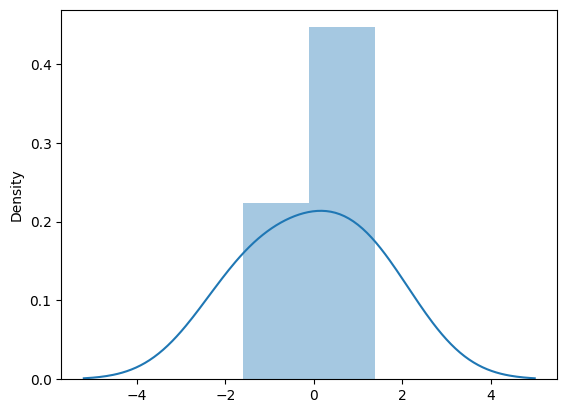

In [68]:
sns.distplot(X_train[0],kde=True)  # Dist with Mean=0 and Std dev =1

# Normalisation

In [69]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [70]:
X_train

array([[0.        , 0.40201142, 0.18249985],
       [1.        , 0.38842077, 0.01512699],
       [0.5       , 0.17097037, 0.03806147],
       ...,
       [0.        , 0.55150856, 0.26252652],
       [0.        , 0.59228051, 0.11316786],
       [1.        , 0.39792223, 0.13575256]])

<ipython-input-71-6150faddf84e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[0],kde=True)  # Dist with values in between 0 to 1


<Axes: ylabel='Density'>

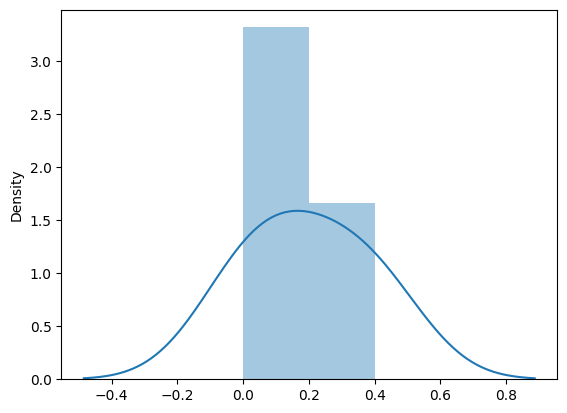

In [71]:
sns.distplot(X_train[0],kde=True)  # Dist with values in between 0 to 1

# Robust Scaler

In [72]:
from sklearn.preprocessing import RobustScaler
scale=RobustScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [73]:
X_train

array([[-2.        ,  0.0231448 ,  3.40333872],
       [ 0.        , -0.05377828, -0.2907916 ],
       [-1.        , -1.28454751,  0.21540118],
       ...,
       [-2.        ,  0.86929864,  5.16962843],
       [-2.        ,  1.10006787,  1.87309424],
       [ 0.        ,  0.        ,  2.37156704]])

<ipython-input-74-b880110ad2d5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[0],kde=True)  # Dist with values considering the outliers


<Axes: ylabel='Density'>

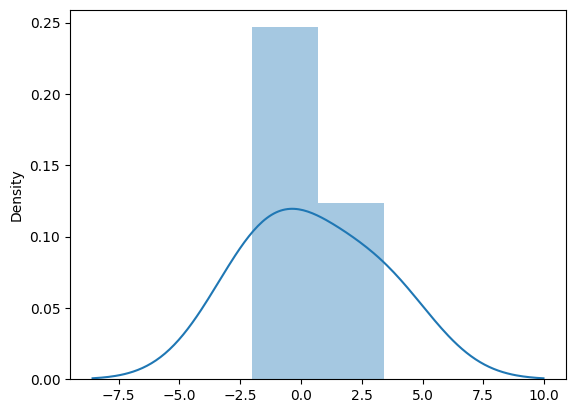

In [74]:
sns.distplot(X_train[0],kde=True)  # Dist with values considering the outliers

# Gaussian Transformation

*   logarithmic transformation
*   reciprocal transformation
*   square root transformation
*   exponential transformation (more general, you can use any exponent)
*   boxcox transformation


In [75]:
df.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [76]:
import scipy.stats as stats
import pylab

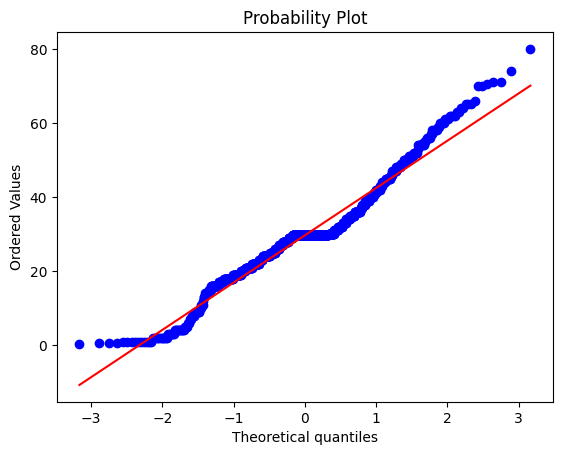

In [100]:
stats.probplot(df["age"],dist="norm",plot=pylab)
plt.show()

<Axes: >

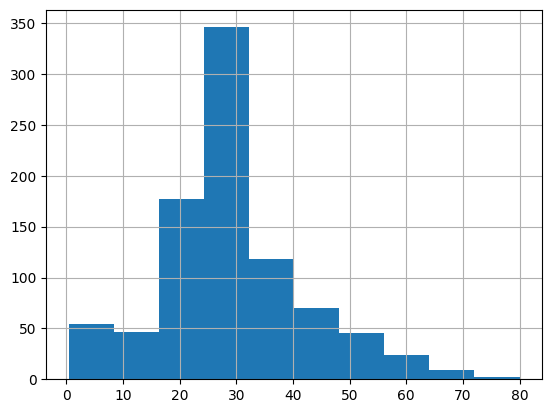

In [78]:
df["age"].hist()

# logarithmic transformation

In [79]:
df["age_log"]=np.log(df["age"])

<Axes: >

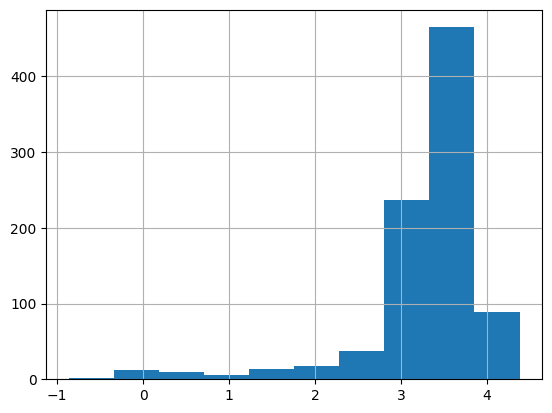

In [80]:
df["age_log"].hist()

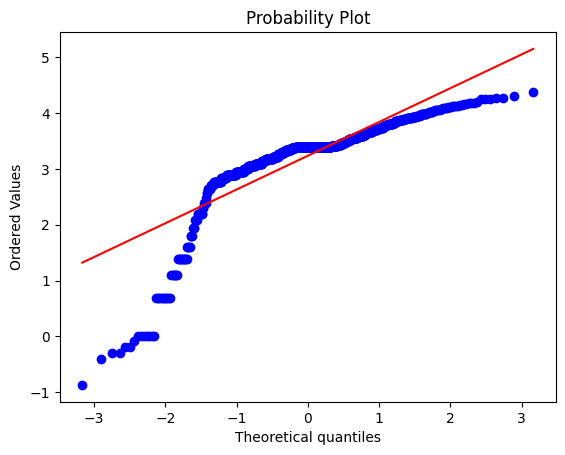

In [99]:
stats.probplot(df["age_log"],dist="norm",plot=pylab)
plt.show()

# Reciprocal Transformation

In [82]:
df["age_reciprocal"]=1/df["age"]

<Axes: >

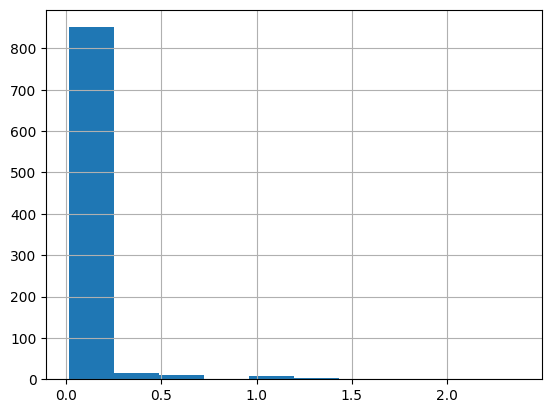

In [86]:
df["age_reciprocal"].hist()

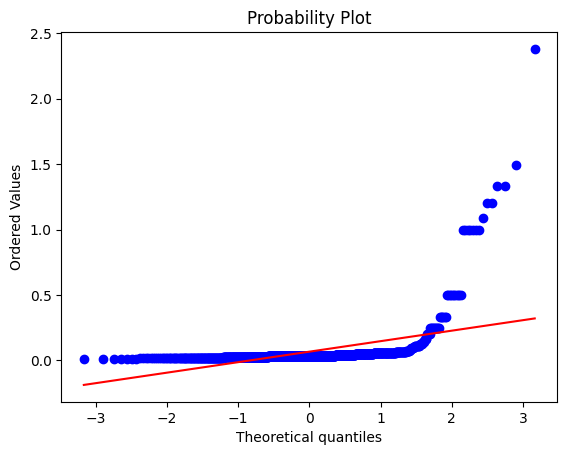

In [98]:
stats.probplot(df["age_reciprocal"],dist="norm",plot=pylab)
plt.show()

# Squre root Transformation

In [84]:
df["age_squre_root"]=df["age"]**(1/2)

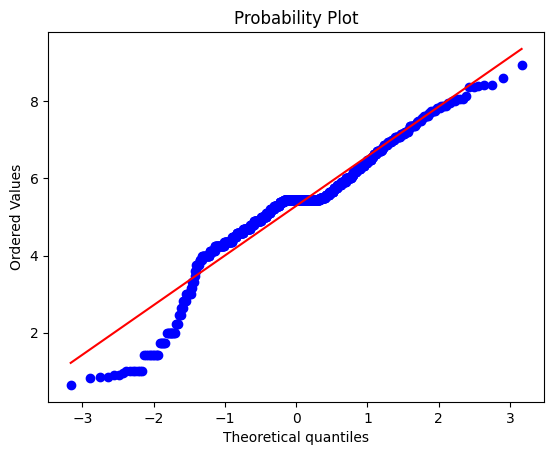

In [97]:
stats.probplot(df["age_squre_root"],dist="norm",plot=pylab)
plt.show()

<Axes: >

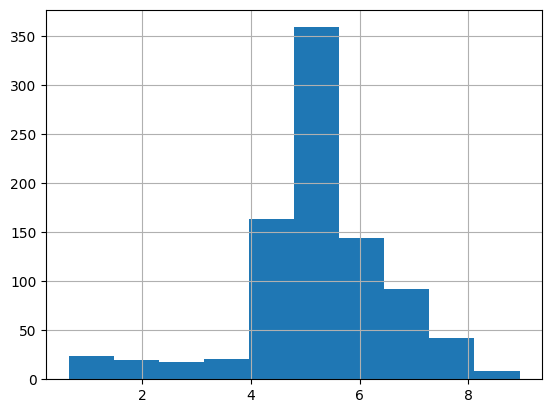

In [87]:
df["age_squre_root"].hist()

# Exponential trasformation

In [89]:
df["Age_exponential"]=df["age"]**(1/1.2)

<Axes: >

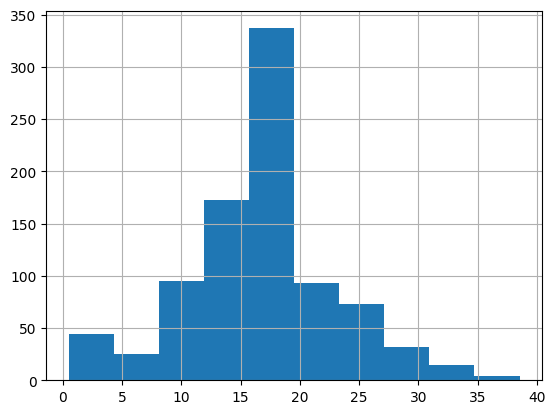

In [90]:
df["Age_exponential"].hist()

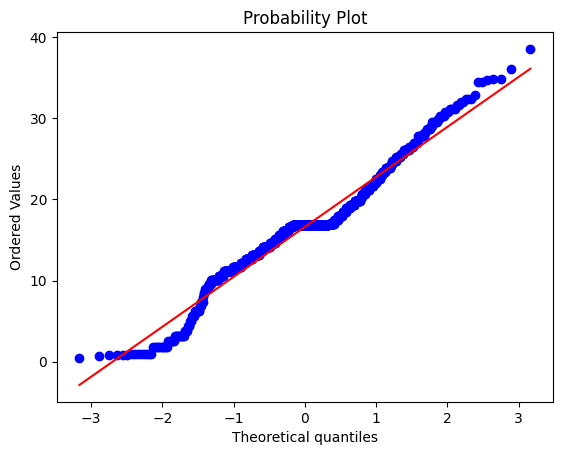

In [96]:
stats.probplot(df["Age_exponential"],dist="norm",plot=pylab)
plt.show()

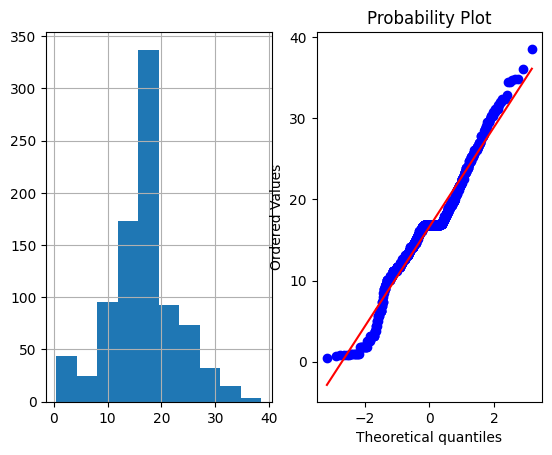

In [101]:
plt.subplot(1,2,1)
df["Age_exponential"].hist()
plt.subplot(1,2,2)
stats.probplot(df["Age_exponential"],dist="norm",plot=pylab)
plt.show()

# Box cox Transformation

In [102]:
df["age_boxcox"],parameters=stats.boxcox(df["age"])

In [103]:
print(parameters)

0.8229818246208759


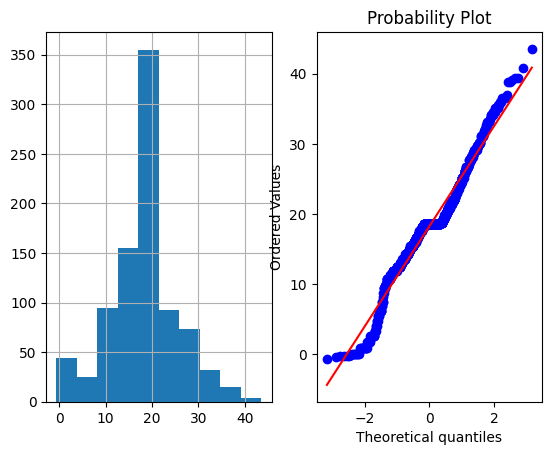

In [104]:
plt.subplot(1,2,1)
df["age_boxcox"].hist()
plt.subplot(1,2,2)
stats.probplot(df["age_boxcox"],dist="norm",plot=pylab)
plt.show()